In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


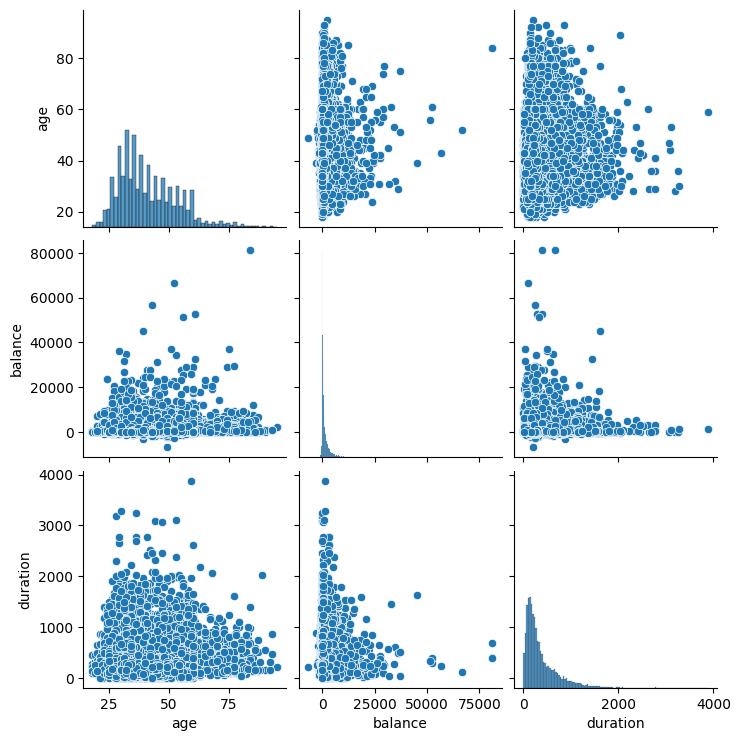

In [3]:
#Plot Age, Income and Spending Score Correlation
sns.pairplot(df[['age','balance', 'duration']])

In [4]:
# Creating clusters
kmeans = cluster.KMeans(n_clusters=4)
kmeans = kmeans.fit(df[['age','balance']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
kmeans.cluster_centers_

array([[4.06115460e+01, 5.71762775e+02],
       [4.31390135e+01, 1.47455291e+04],
       [5.35625000e+01, 4.76855000e+04],
       [4.41791304e+01, 4.49347942e+03]])

In [6]:
df['Clusters'] = kmeans.labels_
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Clusters
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,0
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,0
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,0


In [7]:
df['Clusters'].value_counts()

Clusters
0    9199
3    1724
1     223
2      16
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='balance'>

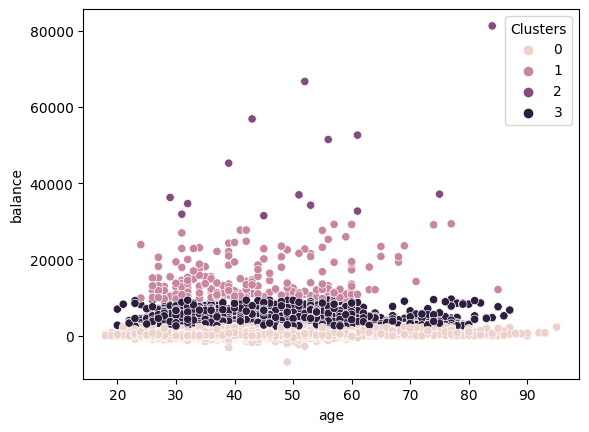

In [8]:
sns.scatterplot(x="age", y="balance",hue = 'Clusters',  data=df)

In [9]:
silhouette_avg = silhouette_score(df[['age','balance']], df['Clusters'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.732931695929221
